In [1]:
# In this cell we import the modules we want to use later on.
import pandas     # To work with tables
import numpy      # For maths
import seaborn    # For advanced plots
import cufflinks  # For interactive plots
from matplotlib import pyplot as plt

cufflinks.go_offline()

In [2]:
advert = pandas.read_csv('Advertising.csv')

In [3]:
advert

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
advert=pandas.read_csv('Advertising.csv',index_col=0)
advert.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# Import a dataset of advertising spends
advert = pandas.read_csv('Advertising.csv', index_col=0)

# Display the first five rows of the data
advert.head(18)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [6]:
piovted=pandas.melt(advert.reset_index(),id_vars=['index','newspaper'])
piovted=pivoted.rename(columns=['index':'transaction','value':'spend','variable':'channel'])
pivoted.head(200)

SyntaxError: invalid syntax (4119110057.py, line 2)

In [ ]:
# Make a table with one row per ad channel
pivoted = pandas.melt(advert.reset_index(), id_vars=['index', 'sales'])

# Rename columns to be more friendly
pivoted = pivoted.rename(columns={'index':'transaction', 'value':'spend', 'variable':'channel'})

pivoted.head(180)

In [ ]:
advert.iplot(kind='box')

In [ ]:
plt.figure(figsize=(12, 6))
ax = seaborn.scatterplot(data='pivoted', x='sales', y='spend', hue='channel')

In [41]:
plt.figure(figsize=(12, 6))
ax = seaborn.violinplot(data='pivoted', y='spend', x='channel')

AttributeError: 'str' object has no attribute 'get'

<Figure size 864x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
ax = seaborn.violinplot(data=pivoted, y='spend', x='sales')

In [8]:
plt.figure(figsize=(12, 6))
ax = seaborn.violinplot(data=pivoted, y='spend', x='spend')

NameError: name 'pivoted' is not defined

<Figure size 864x432 with 0 Axes>

In [9]:
advert.iplot(kind='scatter', x='sales', mode='markers')

In [10]:
advert.iplot(x='sales')

In [11]:
advert.iplot(kind='scatter', x='sales')

In [12]:
advert.iplot(x='sales', mode='markers')

In [13]:
advert.iplot(kind='box')

In [14]:
advert.iplot(kind='box')

In [15]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'newspaper']
X = advert[predictors]
y = advert['sales']
# Initialise and fit model
lm = LinearRegression()
model_TV_Radio = lm.fit(X, y)

In [16]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'radio','newspaper']
X = advert[predictors]
y = advert['sales']

# Initialise and fit model
lm = LinearRegression()
model_TV_Radio = lm.fit(X, y)

In [17]:
# We can examine the model coefficients
print(f'alpha = {model_TV_Radio.intercept_}')
print(f'betas = {model_TV_Radio.coef_}')

alpha = 2.9388893694594067
betas = [ 0.04576465  0.18853002 -0.00103749]


In [18]:
# And predict Sales for a combination of TV and Radio advertising spend
new_X = [[300, 200,450]]
print(model_TV_Radio.predict(new_X))
# model.predict()

[53.90741452]


C:\Users\91630\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [19]:
from sklearn.model_selection import train_test_split
# Divide the data 70-30 into a training and test set
train, test = train_test_split(advert, test_size=0.2)

In [20]:
# Build linear regression model on the training data using all predictors
predictors = ['TV', 'radio', 'newspaper']
X = train[predictors]
y = train['sales']

# Initialise and fit model
lm = LinearRegression()
model_All = lm.fit(X, y)

In [21]:
# Use the model to predict sales for our test data
test['predictions'] = model_All.predict(test[predictors])

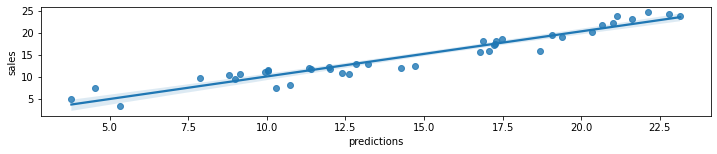

In [22]:
plt.figure(figsize=(12,2))
ax = seaborn.regplot(y='sales', x='predictions', data=test)

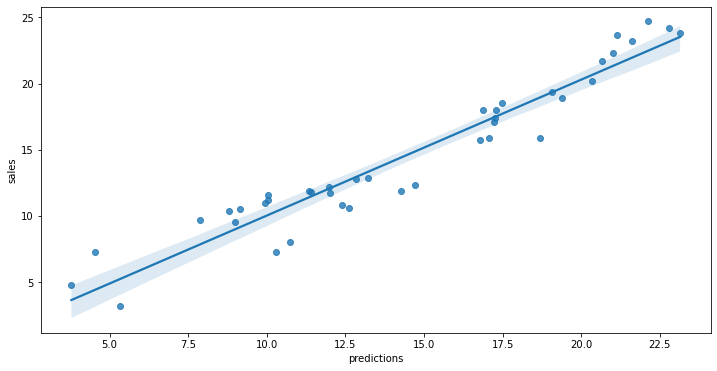

In [23]:
plt.figure(figsize=(12,6))
ax=seaborn.regplot(y='sales',x='predictions',data=test)

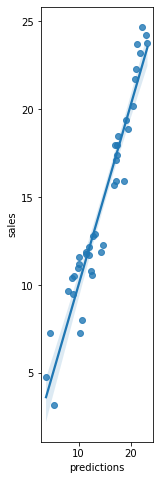

In [24]:
plt.figure(figsize=(2,8))
ax=seaborn.regplot(y='sales',x='predictions',data=test)

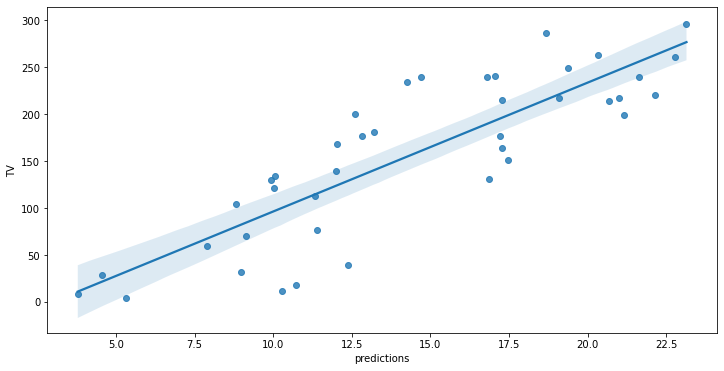

In [25]:
plt.figure(figsize=(12,6))
ax=seaborn.regplot(y='TV',x='predictions',data=test)

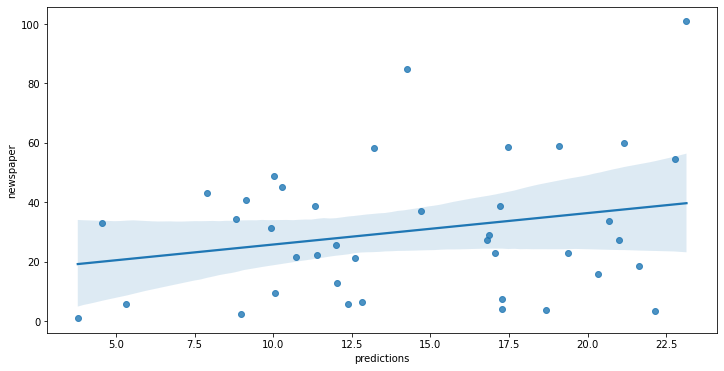

In [26]:
plt.figure(figsize=(12,6))
ax=seaborn.regplot(y='newspaper',x='predictions',data=test)

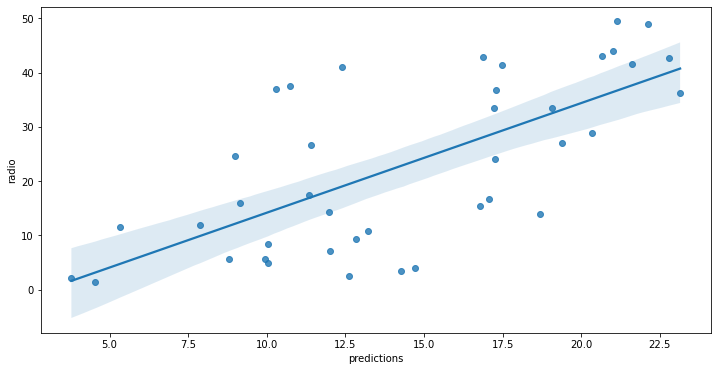

In [27]:
plt.figure(figsize=(12,6))
ax=seaborn.regplot(y='radio',x='predictions',data=test)

In [28]:
r_squared = model_All.score(test[predictors], test["sales"])
print(f'Model R²: {r_squared:.2f}')
# Model R²: 0.92 this for 70% Training data
# Model R²: 0.93 this for 80% Training data

Model R²: 0.92


In [29]:
r_squared = model_All.score(test[predictors], test["sales"])
print(f'Model R²: {r_squared:f}')

Model R²: 0.923713


In [30]:
r_squared =model_All.score(test[predictors], test["sales"])
print(f'Model R²: {r_squared:.4f}')

Model R²: 0.9237


In [31]:
r_squared=model_All.score(test[predictors],test['newspaper'])
print(f'model R²: {r_squared:f}')

model R²: -0.441622


In [32]:
r_squared=model_All.score(test[predictors],test['newspaper'])
print(f'model R²: {r_squared:.2f}')

model R²: -0.44


In [33]:
r_squared=model_All.score(test[predictors],test['newspaper'])
print(f'model R²: {r_squared:.5f}')

model R²: -0.44162


In [34]:
r_squared=model_All.score(test[predictors],test['newspaper'])
print(f'model R²: {r_squared:.3f}')

model R²: -0.442


In [35]:
r_squared=model_All.score(test[predictors],test['radio'])
print(f'model R²: {r_squared:f}')

model R²: 0.032335


In [36]:
r_squared=model_All.score(test[predictors],test['radio'])
print(f'model R²: {r_squared:.2f}')

model R²: 0.03


In [37]:
r_squared=model_All.score(test[predictors],test['radio'])
print(f'model R²: {r_squared:.4f}')

model R²: 0.0323


In [38]:
r_squared=model_All.score(test[predictors],test['TV'])
print(f'model R²: {r_squared:f}')

model R²: -2.727604


In [39]:
r_squared=model_All.score(test[predictors],test['TV'])
print(f'model R²: {r_squared:.2f}')

model R²: -2.73


In [40]:
r_squared=model_All.score(test[predictors],test['TV'])
print(f'model R²: {r_squared:.4f}')

model R²: -2.7276
